1. Data Exploration and Processing

Import relevant libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk
import re

Read the data

In [9]:
df = pd.read_csv('../dataset/oneplus_dataset.csv')
df.head()

,product_title,user_name,rating,review,review_date
0,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,forest,5.0,I bought this phone at the recommendation of a...,"May 19, 2024"
1,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,Drew,5.0,I have this phone for a few months now and for...,"July 26, 2024"
2,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,forest,4.0,I like that this phone has a good battery life...,"January 2, 2024"
3,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,Amazon Customer,5.0,Short version: I got this for my mom since she...,"August 10, 2024"
4,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,C. Jack,5.0,I have a Samsung s22 Ultra. I've been having b...,"May 27, 2024"


In [10]:
df.shape

(1383, 5)

Exploratory Data Analysis

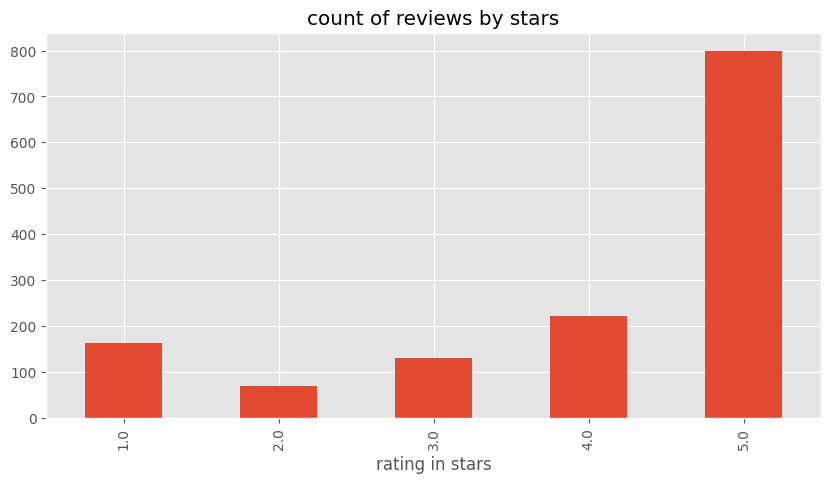

In [11]:
ax = df['rating'].value_counts().sort_index().plot(kind= 'bar' , 
                                        title= 'count of reviews by stars' , 
                                        figsize= (10,5))
ax.set_xlabel('rating in stars')
plt.show()

2. Data Pre-processing

Necessary NLTK resources

In [12]:
from nltk.corpus import stopwords


# nltk.data.path.append('c:/Users/Hasib282/anaconda/nltk_data')

nltk.download('vader_lexicon', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('words', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('maxent_ne_chunker', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('punkt', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('stopwords', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('punkt_tab', download_dir='c:/Users/Hasib282/anaconda/nltk_data')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nl

True

Clean product_title And user_name

In [13]:
def clean_product_title(product_title):
  cleaned_name = re.sub(r'[^\w\s]', '', product_title).strip()
  words = cleaned_name.split()
  return ' '.join(words[:3])

def clean_user_name(user_name):
  cleaned_name = re.sub(r'[^\w\s]', '', user_name).strip()
  words = cleaned_name.split()
  return ' '.join(words[:3])

df['product_title'] = df['product_title'].apply(clean_product_title)

df['user_name'] = df['user_name'].fillna("Amazon User")
df['user_name'] = df['user_name'].apply(clean_user_name)


Clean review

In [14]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\d+','',text) # Remove numbers
    text = re.sub(r'[^\w\s]','',text) # Remove punctuation
    text = re.sub(r'\s+',' ' , text) # Remove extra spaces
    text = text.strip() # Strip leading and trailing spaces
    tokens  = nltk.word_tokenize(text) # Tokenize text
    filtered_words = [word for word in tokens if word not in stop_words] # Remove stop words
    return ' '.join(filtered_words) # Join filtered words back into a single string

# Apply clean_text function to the 'review' column
df['review'] = df['review'].apply(clean_text)

df['ID'] = range(1, len(df) + 1)

df.to_csv('oneplus_clean_dataset.csv', index=False)

df

,product_title,user_name,rating,review,review_date,ID
0,OnePlus Nord N30,forest,5.0,bought phone recommendation friend happy im so...,"May 19, 2024",1
1,OnePlus Nord N30,Drew,5.0,phone months price great phone looking somethi...,"July 26, 2024",2
2,OnePlus Nord N30,forest,4.0,like phone good battery life charges superfast...,"January 2, 2024",3
3,OnePlus Nord N30,Amazon Customer,5.0,short version got mom since habit buying cheap...,"August 10, 2024",4
4,OnePlus Nord N30,C Jack,5.0,samsung ultra ive battery connectivity issues ...,"May 27, 2024",5
...,...,...,...,...,...,...
1378,OnePlus 5 A5000,lylfly,2.0,fantastic camera phone worked great first upda...,"March 14, 2020",1379
1379,OnePlus 5 A5000,Zury,4.0,good one,"October 26, 2019",1380
1380,OnePlus 5 A5000,Andrew,5.0,love phone one got destroyed unfortunate accid...,"March 9, 2019",1381
1381,OnePlus 5 A5000,Kindle Customer,5.0,medium range phone great price great camera gb...,"September 17, 2018",1382


3. VADER Model

Initialize VADER

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
example = df['review'] [10]
example

'bought mom gift motorola rev g years phone case bit larger previous one still operates like android subtle differences knowledge gap easy get caught onthe display nice sound impressive camera many options serve purpose picture quality nice im professional photographer im sure better cameras higher priced devices speed smoothness operating specs dont lie exact hat paying job well im impressed power supply comes supplied charger cord fast charge phone full time ive told battery last work shift'

In [17]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9766}

Apply Vader

In [18]:
#Run the polarity score on the whole dataset
res = {}
for i, row in tqdm(df.iterrows() , total= len(df)):
    review = row['review']
    myid   = row['ID']
    res[myid] = sia.polarity_scores(review)

res

  0%|          | 0/1383 [00:00<?, ?it/s]

100%|██████████| 1383/1383 [00:02<00:00, 471.79it/s]


{1: {'neg': 0.08, 'neu': 0.642, 'pos': 0.278, 'compound': 0.9923},
 2: {'neg': 0.046, 'neu': 0.724, 'pos': 0.23, 'compound': 0.9906},
 3: {'neg': 0.046, 'neu': 0.7, 'pos': 0.254, 'compound': 0.9758},
 4: {'neg': 0.036, 'neu': 0.796, 'pos': 0.168, 'compound': 0.9088},
 5: {'neg': 0.046, 'neu': 0.803, 'pos': 0.151, 'compound': 0.967},
 6: {'neg': 0.089, 'neu': 0.565, 'pos': 0.346, 'compound': 0.9624},
 7: {'neg': 0.049, 'neu': 0.72, 'pos': 0.231, 'compound': 0.9843},
 8: {'neg': 0.117, 'neu': 0.619, 'pos': 0.264, 'compound': 0.9958},
 9: {'neg': 0.081, 'neu': 0.727, 'pos': 0.192, 'compound': 0.9765},
 10: {'neg': 0.039, 'neu': 0.699, 'pos': 0.262, 'compound': 0.986},
 11: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9766},
 12: {'neg': 0.088, 'neu': 0.744, 'pos': 0.169, 'compound': 0.7102},
 13: {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.9593},
 14: {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.34},
 15: {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound':

Plot VADER

In [19]:
vaders = pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index' : 'ID'})
vaders = vaders.merge(df,how='left')

vaders

,ID,neg,neu,pos,compound,product_title,user_name,rating,review,review_date
0,1,0.080,0.642,0.278,0.9923,OnePlus Nord N30,forest,5.0,bought phone recommendation friend happy im so...,"May 19, 2024"
1,2,0.046,0.724,0.230,0.9906,OnePlus Nord N30,Drew,5.0,phone months price great phone looking somethi...,"July 26, 2024"
2,3,0.046,0.700,0.254,0.9758,OnePlus Nord N30,forest,4.0,like phone good battery life charges superfast...,"January 2, 2024"
3,4,0.036,0.796,0.168,0.9088,OnePlus Nord N30,Amazon Customer,5.0,short version got mom since habit buying cheap...,"August 10, 2024"
4,5,0.046,0.803,0.151,0.9670,OnePlus Nord N30,C Jack,5.0,samsung ultra ive battery connectivity issues ...,"May 27, 2024"
...,...,...,...,...,...,...,...,...,...,...
1378,1379,0.120,0.581,0.298,0.6808,OnePlus 5 A5000,lylfly,2.0,fantastic camera phone worked great first upda...,"March 14, 2020"
1379,1380,0.000,0.256,0.744,0.4404,OnePlus 5 A5000,Zury,4.0,good one,"October 26, 2019"
1380,1381,0.408,0.351,0.241,-0.5859,OnePlus 5 A5000,Andrew,5.0,love phone one got destroyed unfortunate accid...,"March 9, 2019"
1381,1382,0.000,0.431,0.569,0.9169,OnePlus 5 A5000,Kindle Customer,5.0,medium range phone great price great camera gb...,"September 17, 2018"


Visualize VADER

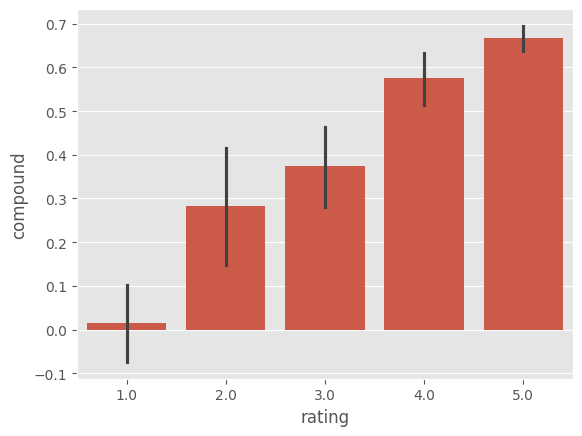

In [20]:
sns.barplot(data=vaders , x='rating' , y = 'compound')
ax.set_title('Compound score by Amazon star review')
plt.show()

Sub-plot for each category

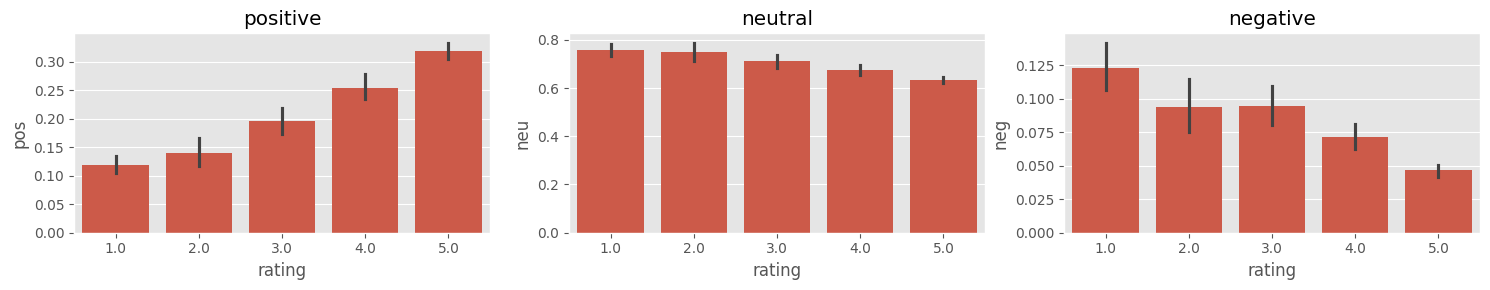

In [21]:
fig, axs=plt.subplots(1, 3 , figsize=(15 , 3))
sns.barplot(data=vaders , x='rating' , y= 'pos' , ax=axs[0])
sns.barplot(data=vaders , x='rating' , y= 'neu' , ax=axs[1])
sns.barplot(data=vaders , x='rating' , y= 'neg' , ax=axs[2])
axs[0].set_title('positive'),
axs[1].set_title('neutral'),
axs[2].set_title('negative'),
plt.tight_layout()
plt.show()

4. Roberta Pretrained Model

Install relevant modules

In [22]:
# pip install transformers
# pip install torch  
# pip install tensorflow   
# pip install flax 
# pip install --upgrade tensorflow-intel
# pip install ml-dtypes==0.2.0

In [23]:
import torch
import sys
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
print("sys path",sys.path)
print(f"PyTorch version: {torch.__version__}")

sys path ['e:\\PDF\\12th sem\\Thesis\\Project\\python-project', 'c:\\Users\\Hasib282\\anaconda\\python312.zip', 'c:\\Users\\Hasib282\\anaconda\\DLLs', 'c:\\Users\\Hasib282\\anaconda\\Lib', 'c:\\Users\\Hasib282\\anaconda', '', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\win32', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\Pythonwin']
PyTorch version: 2.4.1


Initializing Model

In [25]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

print("Model and tokenizer loaded successfully.")

c:\Users\Hasib282\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model and tokenizer loaded successfully.


Apply Roberta model

In [26]:
# Apply on a single Data
encoded_text = tokenizer (example, return_tensors= 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores [0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
}
scores_dict

{'roberta_neg': 0.009040032,
 'roberta_neu': 0.08916201,
 'roberta_pos': 0.901798}

In [27]:
# Create function for checking polarity score of roberta 
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt", padding="max_length", max_length=512, truncation=True)
    output = model(**encoded_text)
    rating = output[0][0].detach().numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg': rating[0],
        'roberta_neu': rating[1],
        'roberta_pos': rating[2]
    }
    return rating_dict

In [28]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    review = row['review']
    myid   = row['ID']
    vader_result = sia.polarity_scores(review)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(review)
    both = {**vader_result_rename , **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for Id {myid}')


100%|██████████| 1383/1383 [1:02:16<00:00,  2.70s/it]


In [29]:
result_df = pd.DataFrame(res).T
result_df= result_df.reset_index().rename(columns={'index' : 'ID'})
result_df = result_df.merge(df,how='left')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
result_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_title',
       'user_name', 'rating', 'review', 'review_date'],
      dtype='object')

Compare Results:

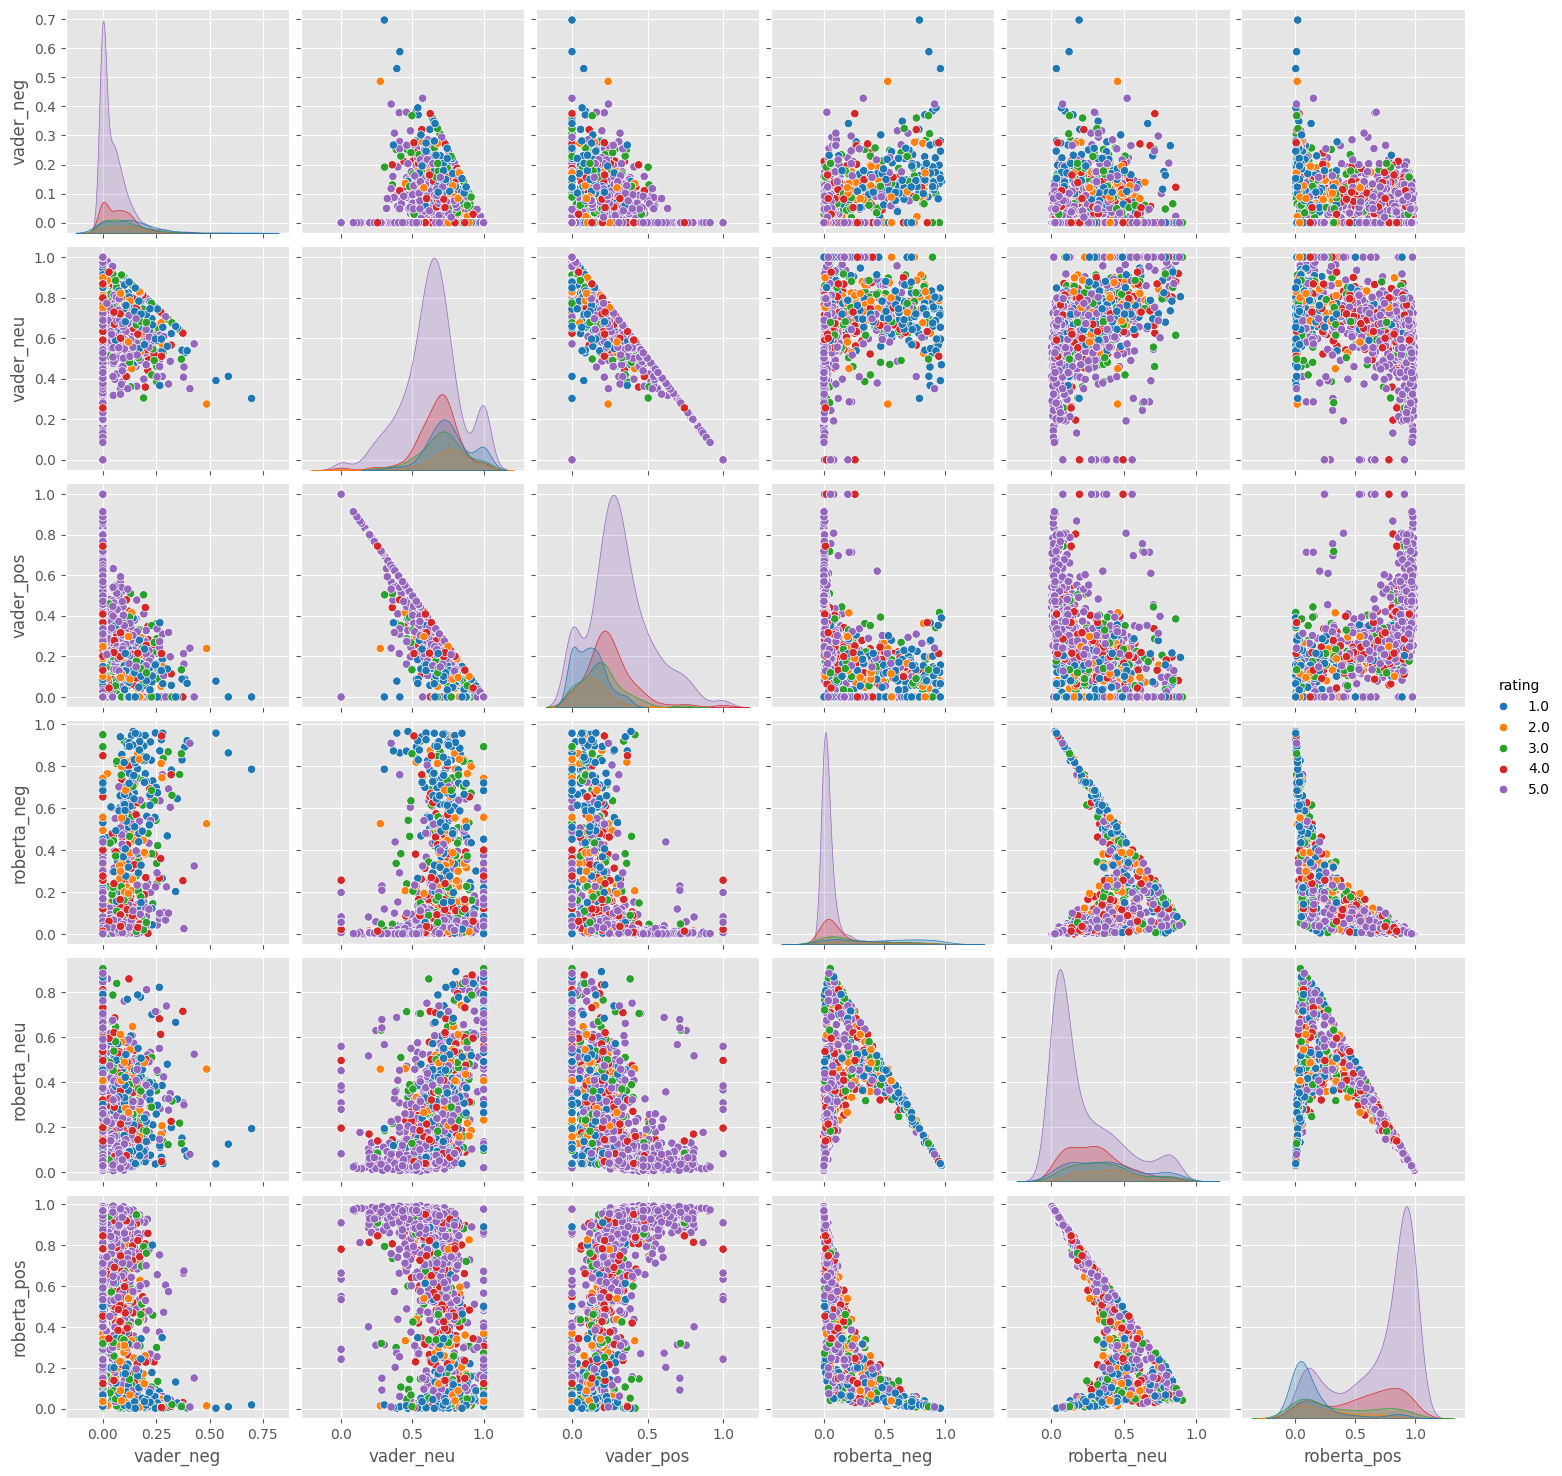

In [30]:
sns.pairplot(data=result_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='rating',
             palette="tab10")

plt.show()

In [31]:
result_df.to_csv('oneplus_sentiment_result.csv', index=False)
new_df = result_df[['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'rating', 'review']]
new_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rating,review
0,1,0.080,0.642,0.278,0.9923,0.028396,0.192447,0.779156,5.0,bought phone recommendation friend happy im so...
1,2,0.046,0.724,0.230,0.9906,0.298089,0.459646,0.242265,5.0,phone months price great phone looking somethi...
2,3,0.046,0.700,0.254,0.9758,0.031837,0.229654,0.738509,4.0,like phone good battery life charges superfast...
3,4,0.036,0.796,0.168,0.9088,0.031383,0.166883,0.801733,5.0,short version got mom since habit buying cheap...
4,5,0.046,0.803,0.151,0.9670,0.151180,0.430378,0.418441,5.0,samsung ultra ive battery connectivity issues ...
5,6,0.089,0.565,0.346,0.9624,0.042781,0.111295,0.845924,5.0,great phone pixel diemy fault thought would up...
6,7,0.049,0.720,0.231,0.9843,0.015722,0.152787,0.831491,3.0,ive following oneplus products since beginning...
7,8,0.117,0.619,0.264,0.9958,0.158400,0.577484,0.264116,4.0,im conflicted even writing goes thing impressi...
8,9,0.081,0.727,0.192,0.9765,0.020908,0.174590,0.804502,5.0,first im power user cant speak processor speed...
9,10,0.039,0.699,0.262,0.9860,0.042580,0.213798,0.743623,5.0,bought dad bought one helped set saw amazing p...
